In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')

### 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [3]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### 2. Подготовьте датасет к обучению моделей.
<b> a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Sex

In [5]:
from sklearn.preprocessing import LabelEncoder

ExerciseAngina

In [6]:
labelencoder = LabelEncoder()
data_ang = labelencoder.fit_transform(data['ExerciseAngina'].values)

In [7]:
ed = pd.DataFrame()
ed['ExerciseAngina'] = data['ExerciseAngina']
ed['num'] = data_ang
ed.drop_duplicates(subset='num', keep='first', inplace=False)

,ExerciseAngina,num
0,N,0
3,Y,1


In [8]:
data['ExerciseAngina'] = data_ang

In [9]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,0,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,0,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,1,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,0,0.0,Flat,1


Sex

In [10]:
selectedColumns = data.copy()
X = pd.get_dummies(selectedColumns, columns=['Sex'])
X

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M
0,40,ATA,140,289,0,Normal,172,0,0.0,Up,0,False,True
1,49,NAP,160,180,0,Normal,156,0,1.0,Flat,1,True,False
2,37,ATA,130,283,0,ST,98,0,0.0,Up,0,False,True
3,48,ASY,138,214,0,Normal,108,1,1.5,Flat,1,True,False
4,54,NAP,150,195,0,Normal,122,0,0.0,Up,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,0,1.2,Flat,1,False,True
914,68,ASY,144,193,1,Normal,141,0,3.4,Flat,1,False,True
915,57,ASY,130,131,0,Normal,115,1,1.2,Flat,1,False,True
916,57,ATA,130,236,0,LVH,174,0,0.0,Flat,1,True,False


ST_Slope

In [11]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [12]:
selectedColumns = X.copy()
X = pd.get_dummies(selectedColumns, columns=['ST_Slope'])
X

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,ATA,140,289,0,Normal,172,0,0.0,0,False,True,False,False,True
1,49,NAP,160,180,0,Normal,156,0,1.0,1,True,False,False,True,False
2,37,ATA,130,283,0,ST,98,0,0.0,0,False,True,False,False,True
3,48,ASY,138,214,0,Normal,108,1,1.5,1,True,False,False,True,False
4,54,NAP,150,195,0,Normal,122,0,0.0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,0,1.2,1,False,True,False,True,False
914,68,ASY,144,193,1,Normal,141,0,3.4,1,False,True,False,True,False
915,57,ASY,130,131,0,Normal,115,1,1.2,1,False,True,False,True,False
916,57,ATA,130,236,0,LVH,174,0,0.0,1,True,False,False,True,False


RestingECG

In [13]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [14]:
selectedColumns = X.copy()
X = pd.get_dummies(selectedColumns, columns=['RestingECG'])
X

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,ATA,140,289,0,172,0,0.0,0,False,True,False,False,True,False,True,False
1,49,NAP,160,180,0,156,0,1.0,1,True,False,False,True,False,False,True,False
2,37,ATA,130,283,0,98,0,0.0,0,False,True,False,False,True,False,False,True
3,48,ASY,138,214,0,108,1,1.5,1,True,False,False,True,False,False,True,False
4,54,NAP,150,195,0,122,0,0.0,0,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,132,0,1.2,1,False,True,False,True,False,False,True,False
914,68,ASY,144,193,1,141,0,3.4,1,False,True,False,True,False,False,True,False
915,57,ASY,130,131,0,115,1,1.2,1,False,True,False,True,False,False,True,False
916,57,ATA,130,236,0,174,0,0.0,1,True,False,False,True,False,True,False,False


ChestPainType

In [15]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [16]:
selectedColumns = X.copy()
X = pd.get_dummies(selectedColumns, columns=['ChestPainType'])
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,172,0,0.0,0,False,True,False,False,True,False,True,False,False,True,False,False
1,49,160,180,0,156,0,1.0,1,True,False,False,True,False,False,True,False,False,False,True,False
2,37,130,283,0,98,0,0.0,0,False,True,False,False,True,False,False,True,False,True,False,False
3,48,138,214,0,108,1,1.5,1,True,False,False,True,False,False,True,False,True,False,False,False
4,54,150,195,0,122,0,0.0,0,False,True,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,0,1.2,1,False,True,False,True,False,False,True,False,False,False,False,True
914,68,144,193,1,141,0,3.4,1,False,True,False,True,False,False,True,False,True,False,False,False
915,57,130,131,0,115,1,1.2,1,False,True,False,True,False,False,True,False,True,False,False,False
916,57,130,236,0,174,0,0.0,1,True,False,False,True,False,True,False,False,False,True,False,False


In [17]:
X_data = X

Возраст: возраст пациента [лет]

Пол: пол пациента [М: Мужчина, Ж: Женщина]

ChestPainType: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная]

RestingBP: артериальное давление в состоянии покоя [мм рт. ст.]

Холестерин: холестерин сыворотки [мм/дл]

FastingBS: уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: в противном случае]

ЭКГ покоя: результаты электрокардиограммы покоя [Нормальный: нормальный, ST: наличие аномалий ST-T (инверсия зубца T и/или подъем или депрессия ST > 0,05 мВ), ГЛЖ: вероятная или определенная гипертрофия левого желудочка по критериям Эстеса]

MaxHR: достигнутая максимальная частота пульса [числовое значение от 60 до 202]

Стенокардия при физической нагрузке: стенокардия, вызванная физической нагрузкой [Д: Да, Н: Нет]

Oldpeak: oldpeak = ST [Числовое значение, измеренное при депрессии]

ST_Slope: наклон пикового сегмента ST при нагрузке [Вверх: вверх, Плоский: плоский, Вниз: вниз]

HeartDisease: выходной класс [1: заболевание сердца, 0: нормальное]

### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [18]:
X_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_F,Sex_M,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,172,0,0.0,0,False,True,False,False,True,False,True,False,False,True,False,False
1,49,160,180,0,156,0,1.0,1,True,False,False,True,False,False,True,False,False,False,True,False
2,37,130,283,0,98,0,0.0,0,False,True,False,False,True,False,False,True,False,True,False,False
3,48,138,214,0,108,1,1.5,1,True,False,False,True,False,False,True,False,True,False,False,False
4,54,150,195,0,122,0,0.0,0,False,True,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,0,1.2,1,False,True,False,True,False,False,True,False,False,False,False,True
914,68,144,193,1,141,0,3.4,1,False,True,False,True,False,False,True,False,True,False,False,False
915,57,130,131,0,115,1,1.2,1,False,True,False,True,False,False,True,False,True,False,False,False
916,57,130,236,0,174,0,0.0,1,True,False,False,True,False,True,False,False,False,True,False,False


In [19]:
X_data.columns.tolist()

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'HeartDisease',
 'Sex_F',
 'Sex_M',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA']

In [20]:
x = X_data[['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA']]
y = X_data[['HeartDisease']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

### 4. Обучите модель логистической регрессии с параметрами по умолчанию.


In [22]:
from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression() #если не ставить максимальную глубина, метрики все 1.0
log_regr.fit(x, y)

LogisticRegression()

In [23]:
predictions = log_regr.predict(X_test)
predictions

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

### 5. Подсчитайте основные метрики модели. Используйте следующие метрики и функцию:
cross_validate(…, cv=10, scoring=[‘accuracy’,‘recall’,‘precision’,‘f1’])

In [24]:
from sklearn.model_selection import cross_validate

In [25]:
cross_validate(log_regr, x, y, cv=10, scoring=['accuracy','recall','precision','f1'])

{'fit_time': array([0.05847788, 0.04683232, 0.04683161, 0.04997873, 0.04683161,
        0.04682803, 0.04683208, 0.05448031, 0.04905748, 0.04683399]),
 'score_time': array([0.02369952, 0.01565385, 0.01565361, 0.01565433, 0.01565766,
        0.01565289, 0.0156579 , 0.00734711, 0.01565146, 0.01565361]),
 'test_accuracy': array([0.83695652, 0.92391304, 0.88043478, 0.9673913 , 0.86956522,
        0.82608696, 0.89130435, 0.83695652, 0.73626374, 0.76923077]),
 'test_recall': array([0.78431373, 0.90196078, 0.8627451 , 0.98039216, 0.98039216,
        1.        , 0.98039216, 0.82352941, 0.76      , 0.7       ]),
 'test_precision': array([0.90909091, 0.95833333, 0.91666667, 0.96153846, 0.81967213,
        0.76119403, 0.84745763, 0.875     , 0.76      , 0.85365854]),
 'test_f1': array([0.84210526, 0.92929293, 0.88888889, 0.97087379, 0.89285714,
        0.86440678, 0.90909091, 0.84848485, 0.76      , 0.76923077])}

### 6. Оптимизируйте 3-4 параметра модели:

###### a) Используйте GridSearchCV.

In [26]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#модель уже создана выше, log_regr

In [56]:
# instantiate the grid инициализируем модель. принимает модель (log_regr)
#и сетку параметров. n_jobs может быть для ускорения работы модели (раскидывает по ядрам)
#verbose как часто смотрим логгирование
#пустой param_grid означает параметры по умолчанию
grid = GridSearchCV(log_regr, cv=10, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],'class_weight': [{0:1, 1:2}], 'max_iter':[1,5,10,50]}, scoring='accuracy')

#'C' параметр, определяющий инверсию силы регуляризации. Чем меньше значение С, тем сильнее регуляризация
#'class_weight': параметр, позволяющий задать веса для классов в задаче классификации
#'max_iter': максимальное количество итераций для сходимости оптимизационного алгоритма

In [57]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [{0: 1, 1: 2}],
                         'max_iter': [1, 5, 10, 50]},
             scoring='accuracy')

In [58]:
grid.best_score_

0.8610144390966308

In [59]:
grid.best_estimator_.score(X_test, y_test) #прогоняем на тестовой выборке

0.8152173913043478

In [60]:
%%time

param_grid = {}
log_regr = LogisticRegression()
grid = GridSearchCV(log_regr, param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],'class_weight': [{0:1, 1:2}], 'max_iter':[1,5,10,50]}, cv=10, scoring='accuracy')

grid.fit(X,y)

CPU times: total: 4.03 s
Wall time: 4.19 s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [{0: 1, 1: 2}],
                         'max_iter': [1, 5, 10, 50]},
             scoring='accuracy')

###### d) Повторите п. 5 после каждого итогового изменения параметров.

In [61]:
cross_validate(grid, x, y, cv=10, scoring=['accuracy','recall','precision','f1'])

{'fit_time': array([4.06060505, 4.10176492, 4.0834384 , 4.51242971, 4.04510069,
        4.02821755, 4.21840668, 4.26440835, 4.6099031 , 4.12066078]),
 'score_time': array([0.01565623, 0.01565528, 0.03124619, 0.01565266, 0.01565361,
        0.01565528, 0.03124547, 0.03127527, 0.01811409, 0.01565289]),
 'test_accuracy': array([0.88043478, 0.90217391, 0.95652174, 0.94565217, 0.82608696,
        0.77173913, 0.85869565, 0.82608696, 0.73626374, 0.79120879]),
 'test_recall': array([0.88235294, 0.94117647, 1.        , 0.98039216, 1.        ,
        1.        , 1.        , 0.84313725, 0.82      , 0.8       ]),
 'test_precision': array([0.9       , 0.88888889, 0.92727273, 0.92592593, 0.76119403,
        0.70833333, 0.796875  , 0.84313725, 0.73214286, 0.81632653]),
 'test_f1': array([0.89108911, 0.91428571, 0.96226415, 0.95238095, 0.86440678,
        0.82926829, 0.88695652, 0.84313725, 0.77358491, 0.80808081])}

###### b) Используйте RandomizedSearchCV.

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
%%time
param_grid = {}
log_regr = LogisticRegression()
grid = RandomizedSearchCV(log_regr, param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],'class_weight': [{0:1, 1:2}], 'max_iter':[1,5,10,50]}, cv=10, scoring='accuracy')

grid.fit(X_train, y_train)

CPU times: total: 1.84 s
Wall time: 1.96 s


RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'class_weight': [{0: 1, 1: 2}],
                                        'max_iter': [1, 5, 10, 50]},
                   scoring='accuracy')

In [64]:
grid.best_score_

0.8610144390966308

In [65]:
grid.best_estimator_.score(X_test, y_test)

0.7880434782608695

###### d) Повторите п. 5 после каждого итогового изменения параметров.

In [66]:
cross_validate(grid, x, y, cv=10, scoring=['accuracy','recall','precision','f1'])

{'fit_time': array([1.80674553, 1.58511567, 1.63134813, 1.8553617 , 1.74779296,
        1.99909616, 3.41183662, 2.39919639, 1.75518394, 2.17399478]),
 'score_time': array([0.01565433, 0.03127837, 0.01565194, 0.01565504, 0.03127217,
        0.01575398, 0.01941729, 0.01720762, 0.02059531, 0.01898003]),
 'test_accuracy': array([0.88043478, 0.90217391, 0.88043478, 0.94565217, 0.82608696,
        0.77173913, 0.85869565, 0.82608696, 0.72527473, 0.79120879]),
 'test_recall': array([0.88235294, 0.94117647, 0.90196078, 0.98039216, 1.        ,
        1.        , 1.        , 0.84313725, 0.82      , 0.8       ]),
 'test_precision': array([0.9       , 0.88888889, 0.88461538, 0.92592593, 0.76119403,
        0.70833333, 0.796875  , 0.84313725, 0.71929825, 0.81632653]),
 'test_f1': array([0.89108911, 0.91428571, 0.89320388, 0.95238095, 0.86440678,
        0.82926829, 0.88695652, 0.84313725, 0.76635514, 0.80808081])}

### Сформулируйте выводы по проделанной работе:
###### a) Сравните метрики построенных моделей.

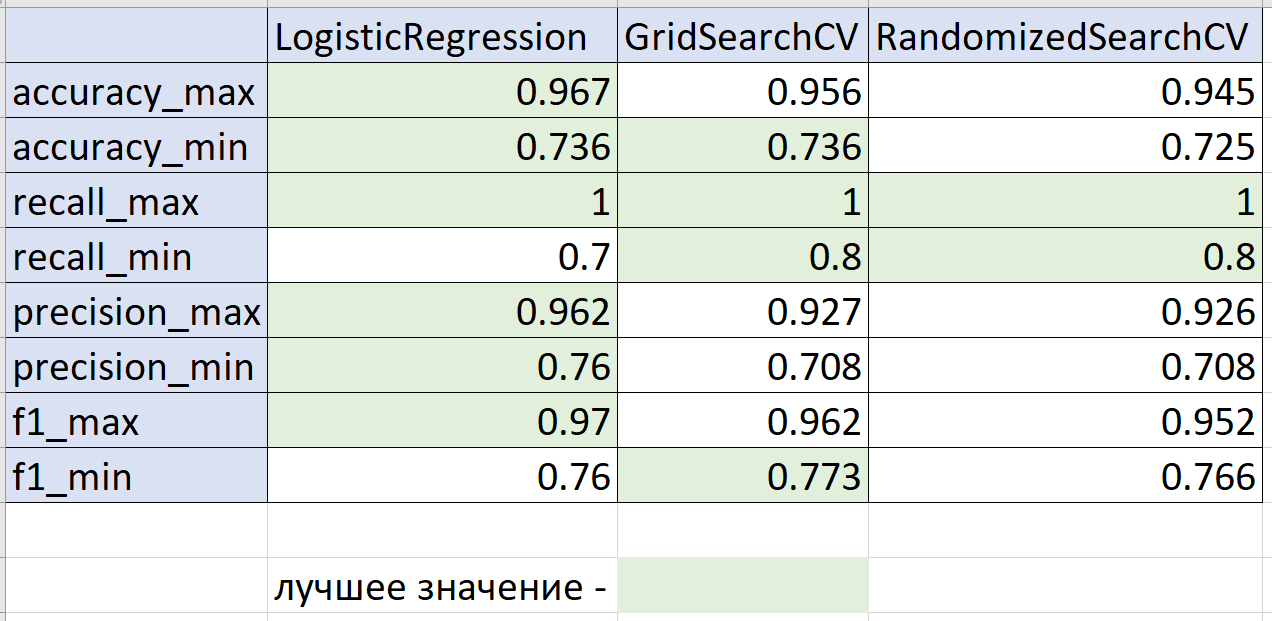

In [67]:
from IPython.display import Image
Image('img.png') 

<b>Время работы
    
    GridSearchCV CPU times: total: 4.03 s
                 Wall time: 4.19 s
                 
    RandomizedSearchCV CPU times: total: 1.84 s
                       Wall time: 1.96 s
                 

Можно заметить, что перебор параметров не всегда повышал метрики качества. Считаю, что это происходит вследствии небольшого количества значений param_grid. При увеличении количества значений сетки качество модели будет возрастать.
    
RandomizedSearchCV совсем не повысил качество модели по сравнению с исходной. Но имеет значительный выигрыш по времени.